In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [230]:
class NeuralNetwork:
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.N = X.shape[0]
        self.H1_SIZE = 256
        self.H2_SIZE = 64
        self.INPUT_DIM = X.shape[1]
        self.OUTPUT_DIM = len(np.unique(y))
        self.losses = list()
        
        self.W1 = np.random.randn(self.INPUT_DIM, self.H1_SIZE)
        self.b1 = np.zeros((1, self.H1_SIZE))
        
        self.W2 = np.random.randn(self.H1_SIZE, self.H2_SIZE)
        self.b2 = np.zeros((1, self.H2_SIZE))
        
        self.W3 = np.random.randn(self.H2_SIZE, self.OUTPUT_DIM)
        self.b3 = np.zeros((1, self.OUTPUT_DIM))
        
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def sigmoid_derivative(self, z):
        s = self.sigmoid(z)
        return s * (1 - s)
    
    def softmax(self, z):
        ez = np.exp(z)
        return ez / ez.sum(axis=1, keepdims=True)
    
    def forward(self, X):
        Z1 = X.dot(self.W1) + self.b1
        A1 = self.sigmoid(Z1)
        Z2 = A1.dot(self.W2) + self.b2
        A2 = self.sigmoid(Z2)
        Z3 = A2.dot(self.W3) + self.b3
        yhat = self.softmax(Z3)

        self.Z1 = Z1
        self.Z2 = Z2
        self.Z3 = Z3
        
        self.activation_outputs = (A1, A2, yhat)
        return yhat
    
    def backward(self, X, y, learning_rate=0.01):
        A1, A2, yhat = self.activation_outputs
        
        delta3 = yhat - y # N,10
        dldw3 = A2.T.dot(delta3) # 64,10
        dldb3 = delta3.sum(axis=0, keepdims=True) # 1,10
        
        delta2 = delta3.dot(self.W3.T) * self.sigmoid_derivative(self.Z2) # N,64
        dldw2 = A1.T.dot(delta2) # 256,64
        dldb2 = delta2.sum(axis=0, keepdims=True) # 1,64
        
        delta1 = delta2.dot(self.W2.T) * self.sigmoid_derivative(self.Z1) # N,256
        dldw1 = X.T.dot(delta1) # 784,256
        dldb1 = delta1.sum(axis=0, keepdims=True) # 1,256
        
        # Update Rule
        self.W3 -= (dldw3 * learning_rate)
        self.b3 -= (dldb3 * learning_rate)
        
        self.W2 -= (dldw2 * learning_rate)
        self.b2 -= (dldb2 * learning_rate)
        
        self.W1 -= (dldw1 * learning_rate)
        self.b1 -= (dldb1 * learning_rate)
        
    
    def compute_loss(self, y, yhat):
        # Cross Entropy Loss
        # Assuming y as One Hot Vectors
        log_loss = -np.sum(y * np.log(yhat))
        return log_loss
    
    def predict(self, x):
        yhat = self.forward(x)
        return np.argmax(yhat, axis=1)        
        
    def accuracy(self, labels, preds):
        return (labels == preds).sum() / labels.shape[0]
    
    def get_one_hot_vector(self, y):
        klasses = np.unique(y)
        vec = np.zeros((y.shape[0], len(klasses)))
        for i in range(vec.shape[0]):
            vec[i, y[i]] = 1
#         vec[np.arange(y.shape[0]), y] = 1
        return vec
    
    def train(self, learning_rate=0.01, epochs=100, batch_size=200):
        y_one_hot = self.get_one_hot_vector(self.y)

        for e in range(epochs):
            size = 0
            while (size + batch_size) < self.X.shape[0]:
                X_batch = self.X[size : size+batch_size]
                y_batch = self.y[size : size+batch_size]
                y_batch_one_hot = self.get_one_hot_vector(y_batch)
                size += batch_size
                
                _ = self.forward(X_batch)
                self.backward(X_batch, y_batch_one_hot)
            
            yhat = self.forward(self.X)
            self.losses.append(self.compute_loss(y_one_hot, yhat))
            if e%10 == 0:
                print("Epoch [{}]  Loss: {}".format(e, self.losses[-1]))

In [219]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
dataset = read_csv('../datasets/mnist_data/train.csv').values

In [237]:
X_train, X_test, y_train, y_test = train_test_split(dataset[:, 1:], dataset[:, 0], test_size=0.2)
X_train, X_test = X_train/255, X_test/255

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33600, 784) (8400, 784) (33600,) (8400,)


In [254]:
nn = NeuralNetwork(X_train, y_train)

In [255]:
nn.train(learning_rate=0.001, epochs=200, batch_size=500)

Epoch [0]  Loss: 34699.812641679
Epoch [10]  Loss: 4619.33222680925
Epoch [20]  Loss: 2282.3145752433456
Epoch [30]  Loss: 1349.6778794108427
Epoch [40]  Loss: 931.0350225696692
Epoch [50]  Loss: 694.320622224706
Epoch [60]  Loss: 538.6482812253131
Epoch [70]  Loss: 424.3292063699831
Epoch [80]  Loss: 350.98272040591473
Epoch [90]  Loss: 300.4702020922559
Epoch [100]  Loss: 263.26420269605995
Epoch [110]  Loss: 232.56992163550748
Epoch [120]  Loss: 207.97200234089533
Epoch [130]  Loss: 191.34538551147403
Epoch [140]  Loss: 177.24975272813646
Epoch [150]  Loss: 164.9093425566378
Epoch [160]  Loss: 153.61204116731204
Epoch [170]  Loss: 142.05342702455633
Epoch [180]  Loss: 132.62009757439526
Epoch [190]  Loss: 123.35918871775615


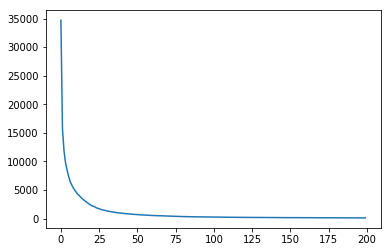

In [256]:
plt.figure()
plt.plot(nn.losses)
plt.show()

In [257]:
preds = nn.predict(X_test)
nn.accuracy(y_test, preds)

0.9363095238095238

## Fashion MNIST

In [260]:
dataset = read_csv('../datasets/fashion-mnist.csv').values

In [261]:
X_train, X_test, y_train, y_test = train_test_split(dataset[:, 1:], dataset[:, 0], test_size=0.2)
X_train, X_test = X_train/255, X_test/255

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 784) (2000, 784) (8000,) (2000,)


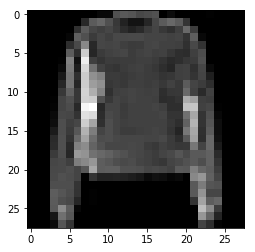

2


In [266]:
plt.figure()
plt.imshow(X_train[0].reshape(28,28), cmap='gray')
plt.show()
print(y_train[0])

In [272]:
nn = NeuralNetwork(X_train, y_train)

In [273]:
nn.train(learning_rate=0.001, epochs=200, batch_size=100)

Epoch [0]  Loss: 6359.119452082961
Epoch [10]  Loss: 2726.79549977552
Epoch [20]  Loss: 1879.9330865300487
Epoch [30]  Loss: 1389.229159258373
Epoch [40]  Loss: 1011.7399580990066
Epoch [50]  Loss: 765.4645900720676
Epoch [60]  Loss: 568.0725871393469
Epoch [70]  Loss: 425.10845351558385
Epoch [80]  Loss: 337.8559860308497
Epoch [90]  Loss: 269.4806873805734
Epoch [100]  Loss: 215.96318747543523
Epoch [110]  Loss: 181.74743755708312
Epoch [120]  Loss: 159.8533728751231
Epoch [130]  Loss: 145.38567417177882
Epoch [140]  Loss: 136.13849900403144
Epoch [150]  Loss: 129.68228389366823
Epoch [160]  Loss: 125.10417793402347
Epoch [170]  Loss: 121.75316679650379
Epoch [180]  Loss: 119.22303475317257
Epoch [190]  Loss: 117.26874581177265


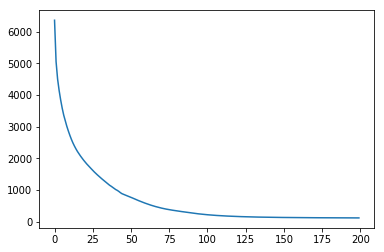

In [274]:
plt.figure()
plt.plot(nn.losses)
plt.show()

In [275]:
preds = nn.predict(X_test)
nn.accuracy(y_test, preds)

0.8335